In [47]:
import pandas as pd

time: 0 ns (started: 2023-08-21 15:09:56 +03:00)


In [48]:
fireball_path = "DATAS/Fireball_And_Bolide_Reports.csv"
meteorite_path = "DATAS/Meteorite_Landings.csv"
full_moons_path = "DATAS/full_moons.csv"
exoplanet_composite_path = "DATAS/NASA_Exoplanet_Composite.csv"
space_missions_path = "DATAS/space_missions1.csv"
space_news_path = "DATAS/spacenews-december-2022.csv"


time: 16 ms (started: 2023-08-21 15:09:56 +03:00)


In [49]:
fireball_data = pd.read_csv(fireball_path)
meteorite_data = pd.read_csv(meteorite_path)
full_moons_data = pd.read_csv(full_moons_path)
exoplanet_composite_data = pd.read_csv(exoplanet_composite_path)
space_missions_path = pd.read_csv(space_missions_path)
space_news_path = pd.read_csv(space_news_path)

time: 1.22 s (started: 2023-08-21 15:09:56 +03:00)


In [50]:
print(fireball_data.head())


  Date/Time - Peak Brightness (UT) Latitude (Deg) Longitude (Deg)  \
0           11/21/2009 08:53:00 PM          22.0S           29.2E   
1           01/09/2015 10:41:11 AM           2.0N           28.8E   
2           05/16/2014 12:42:48 PM          44.2S          176.2W   
3           08/23/2014 06:29:41 AM          61.7S          132.6E   
4           12/12/2014 06:48:11 AM          33.5N          144.9E   

   Altitude (km)  Velocity (km/s)  Velocity Components (km/s): vx  \
0           38.0             32.1                             3.0   
1           36.0              NaN                           -10.7   
2           44.0              NaN                            14.4   
3           22.2             16.2                            -2.3   
4           26.3              NaN                            11.5   

   Velocity Components (km/s): vy  Velocity Components (km/s): vz  \
0                           -17.0                           -27.0   
1                            -7.

In [51]:
print(fireball_data.columns)

Index(['Date/Time - Peak Brightness (UT)', 'Latitude (Deg)', 'Longitude (Deg)',
       'Altitude (km)', 'Velocity (km/s)', 'Velocity Components (km/s): vx',
       'Velocity Components (km/s): vy', 'Velocity Components (km/s): vz',
       'Total Radiated Energy (J)', 'Calculated Total Impact Energy (kt)'],
      dtype='object')
time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [52]:
print(fireball_data.describe())

       Altitude (km)  Velocity (km/s)  Velocity Components (km/s): vx  \
count      68.000000         7.000000                       52.000000   
mean       32.314706        19.228571                        1.469231   
std         8.613219         6.119018                       11.427033   
min        18.700000        12.400000                      -35.400000   
25%        26.300000        17.100000                       -5.050000   
50%        30.700000        18.100000                        1.850000   
75%        37.000000        18.900000                       10.375000   
max        66.600000        32.100000                       21.300000   

       Velocity Components (km/s): vy  Velocity Components (km/s): vz  \
count                       52.000000                       52.000000   
mean                        -2.836538                       -1.138462   
std                         11.861175                       10.081144   
min                        -43.500000             

In [53]:
print(fireball_data.isnull().sum())

fireball_data = fireball_data.dropna()  


Date/Time - Peak Brightness (UT)        0
Latitude (Deg)                          0
Longitude (Deg)                         0
Altitude (km)                          24
Velocity (km/s)                        85
Velocity Components (km/s): vx         40
Velocity Components (km/s): vy         40
Velocity Components (km/s): vz         40
Total Radiated Energy (J)               0
Calculated Total Impact Energy (kt)     0
dtype: int64
time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [54]:
columns_to_drop = ['Velocity Components (km/s): vx', 'Velocity Components (km/s): vy', 'Velocity Components (km/s): vz']
fireball_data = fireball_data.drop(columns=columns_to_drop)


time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [55]:
fireball_data['Date/Time - Peak Brightness (UT)'] = pd.to_datetime(fireball_data['Date/Time - Peak Brightness (UT)'], format='%m/%d/%Y %I:%M:%S %p')


time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [56]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [57]:
fireballs = fireball_data[fireball_data['Total Radiated Energy (J)'] >= 1e10]
bolides = fireball_data[fireball_data['Total Radiated Energy (J)'] < 1e10]

time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [58]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


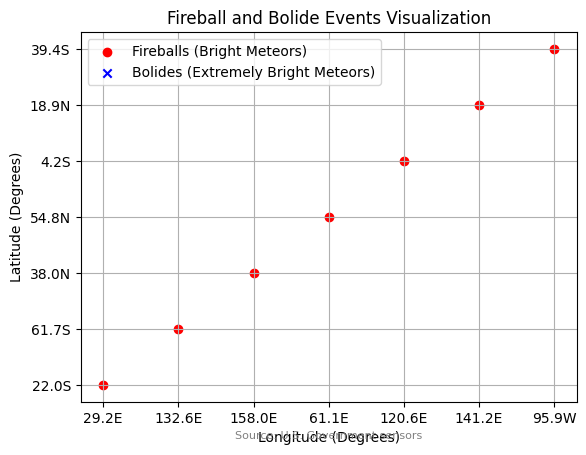

time: 140 ms (started: 2023-08-21 15:09:58 +03:00)


In [59]:

plt.scatter(
    fireballs['Longitude (Deg)'],
    fireballs['Latitude (Deg)'],
    c='red',
    marker='o',
    label='Fireballs (Bright Meteors)'
)

plt.scatter(
    bolides['Longitude (Deg)'],
    bolides['Latitude (Deg)'],
    c='blue',
    marker='x',
    label='Bolides (Extremely Bright Meteors)'
)

plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.title('Fireball and Bolide Events Visualization')
plt.legend()
plt.grid()
plt.annotate(
    'Source: U.S. Government sensors',
    xy=(0.5, -0.1),
    xycoords='axes fraction',
    fontsize=8,
    color='gray',
    ha='center'
)
plt.show()

In [60]:
meteorite_data = pd.read_csv(meteorite_path)


time: 78 ms (started: 2023-08-21 15:09:58 +03:00)


In [61]:
print(meteorite_data.head())


       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  
time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [62]:
print(meteorite_data.columns)

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')
time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [63]:
print(meteorite_data.describe())

                 id      mass (g)          year        reclat       reclong
count  45716.000000  4.558500e+04  45425.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.828817    -39.122580     61.074319
std    16860.683030  5.749889e+05     25.052766     46.378511     80.647298
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2101.000000     81.166670    354.473330
time: 32 ms (started: 2023-08-21 15:09:58 +03:00)


In [64]:
print(meteorite_data.isnull().sum())

meteorite_data = meteorite_data.dropna()  


name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64
time: 31 ms (started: 2023-08-21 15:09:58 +03:00)


In [65]:
import plotly.express as px

fig = px.scatter_geo(
    meteorite_data,
    lat='reclat',
    lon='reclong',
    color='mass (g)',
    size='mass (g)',
    hover_name='name',
    hover_data=['year', 'recclass', 'mass (g)'],
    title='Meteorite Landings Interactive Map',
    template='plotly_dark', 
    opacity=0.7,  
    size_max=40,  
)

fig.update_geos(
    projection_type='orthographic',  
    showcoastlines=True,  
    coastlinecolor='White',  
    showland=True, 
    landcolor='Black',  
    showocean=True, 
    oceancolor='Navy',  
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title='Meteorite Mass (g)',   
        thicknessmode="pixels",
        thickness=20,
        lenmode="pixels",
        len=300,
        xanchor="left",
        x=0,
        yanchor="top",
        y=0.98,
    )
)

# Haritayı gösterme
fig.show()

time: 313 ms (started: 2023-08-21 15:09:58 +03:00)


In [66]:
full_moons_data = pd.read_csv(full_moons_path)


time: 16 ms (started: 2023-08-21 15:09:58 +03:00)


In [67]:
print(full_moons_data.head())


         Day              Date        Time Flag
0     Monday   15 January 1900  8:07:30 pm  NaN
1  Wednesday  14 February 1900  2:50:12 pm  NaN
2     Friday     16 March 1900  9:11:48 am  NaN
3     Sunday     15 April 1900  2:02:06 am  NaN
4     Monday       14 May 1900  4:36:36 pm  NaN
time: 0 ns (started: 2023-08-21 15:09:58 +03:00)


In [68]:
print(full_moons_data.dtypes)


Day     object
Date    object
Time    object
Flag    object
dtype: object
time: 16 ms (started: 2023-08-21 15:09:58 +03:00)


In [69]:
print(full_moons_data.columns)

Index(['Day', 'Date', 'Time', 'Flag'], dtype='object')
time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [70]:
print(full_moons_data.describe())

           Day             Date        Time Flag
count     1868             1868        1868  383
unique       7             1868        1752    7
top     Sunday  15 January 1900  9:18:54 pm  [/]
freq       273                1           3  125
time: 16 ms (started: 2023-08-21 15:09:59 +03:00)


In [71]:
print(full_moons_data.isnull().sum())
full_moons_data = full_moons_data.dropna()

Day        0
Date       0
Time       0
Flag    1485
dtype: int64
time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [72]:
from bokeh.io import output_notebook, show
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [73]:
full_moons_data['DateTime'] = pd.to_datetime(full_moons_data['Date'] + ' ' + full_moons_data['Time'], format='%d %B %Y %I:%M:%S %p')


time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [74]:
output_notebook()
source = ColumnDataSource(full_moons_data)


Loading BokehJS ...

time: 15 ms (started: 2023-08-21 15:09:59 +03:00)


In [75]:
hover = HoverTool(tooltips=[("Date", "@DateTime{%Y-%m-%d %H:%M:%S %p}"), ("Flag", "@Flag")],
                  formatters={"@DateTime": "datetime"},
                  mode="vline")

time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [76]:
colors = factor_cmap('Flag', palette=Spectral6, factors=full_moons_data['Flag'].unique())


time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [77]:
p = figure(width=1000, height=600, x_axis_type="datetime", tools=[hover, "pan", "zoom_in", "zoom_out", "reset"])


time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [78]:
p.circle(x='DateTime', y=0, size=10, color=colors, legend_field='Flag', source=source)


GlyphRenderer(id='p1106', ...)

time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [79]:
p.xaxis.axis_label = 'Date'
p.yaxis.visible = False
p.title.text = 'Full Moons between 1900-2050'
p.legend.title = 'Flag'

time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [80]:
show(p)

time: 32 ms (started: 2023-08-21 15:09:59 +03:00)


In [81]:
%load_ext autotime


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [82]:
print(space_news_path.head(10))


                                               title  \
0               Orion splashes down to end Artemis 1   
1  Polaris Dawn crewed mission could suffer addit...   
2               DART on track for asteroid collision   
3  U.S. Space Command calls for investment in tec...   
4  SpaceX requests permission for direct-to-smart...   
5      ESA funds Skimsat demonstrator study for VLEO   
6  Spire to add ThrustMe propulsion to Lemur cube...   
7                     SLS launches Artemis 1 mission   
8  Defense Innovation Unit selects contractors to...   
9             Ariane 6 launch debut pushed into 2023   

                                                 url  \
0  https://spacenews.com/orion-splashes-down-to-e...   
1  https://spacenews.com/polaris-dawn-crewed-miss...   
2  https://spacenews.com/dart-on-track-for-astero...   
3  https://spacenews.com/u-s-space-command-calls-...   
4  https://spacenews.com/spacex-requests-permissi...   
5  https://spacenews.com/esa-funds-skimsat-demo

In [83]:
import emoji


def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

time: 172 ms (started: 2023-08-21 15:09:59 +03:00)


In [84]:
import string


def text_cleaning(text):
    delete_dict = {sp_character: '' for sp_character in string.puntuation}
    delete_dict['']  = ''
    table = str.maketrans(delete_dict)

    text1 = text.translate(table)
    text1 = remove_emoji(text1)
    textArr= text1.split()
    
    #remove numbers and words less than 3
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and ( not w.isdigit() and len(w)>3))]) 
    return text2.lower()

time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [85]:
space_news_path_not_null = space_news_path.loc[~space_news_path.content.isna(),].copy()


time: 47 ms (started: 2023-08-21 15:09:59 +03:00)


In [86]:
space_news_path = space_news_path.dropna() 

time: 15 ms (started: 2023-08-21 15:09:59 +03:00)


In [87]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

stop_words.update(['use'])
# function to remove stopwords
def stop_words_remover(text):
    text_list = text.split(' ')
    text_free = " ".join([i for i in text_list if i.strip() not in stop_words])
    return text_free



time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [88]:
space_news_path.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18053 entries, 0 to 18353
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        18053 non-null  object
 1   url          18053 non-null  object
 2   content      18053 non-null  object
 3   author       18053 non-null  object
 4   date         18053 non-null  object
 5   postexcerpt  18053 non-null  object
dtypes: object(6)
memory usage: 987.3+ KB
time: 16 ms (started: 2023-08-21 15:09:59 +03:00)


In [89]:
space_news_path['author'].value_counts(ascending=False)[:20]

author
Jeff Foust             4402
Peter B. de Selding    2504
Sandra Erwin           2118
Debra Werner           1296
Caleb Henry            1155
SpaceNews Staff         855
Mike Gruss              780
Dan Leone               778
Jason Rainbow           527
Andrew Jones            387
SpaceNews Editor        343
Warren Ferster          241
Brian Berger            240
Turner Brinton          189
Amy Klamper             164
Phillip Swarts          115
Irene Klotz             112
Park Si-soo             105
Leonard David            75
SpaceNews                70
Name: count, dtype: int64

time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [90]:
import numpy as np


idx = np.random.choice(space_news_path.index)
print(space_news_path.loc[idx, "title"])
print("\n")
print(space_news_path.loc[idx, "author"])
print("\n")
print(space_news_path.loc[idx, "date"])
print("\n")
print(space_news_path.loc[idx, "content"])

Lockheed Space Revenue Dips but Profit Rises


Peter B. de Selding


April 27, 2011


PARIS — Lockheed Martin on April 27 reported a 4 percent drop in revenue, but a 4.8 percent increase in operating profit, in its Space Systems division and said its work on navigation and telecommunications satellites for the U.S. Defense Department are among the top moneymakers for the company in the next few years. Reporting financial results for the three months ending March 31, Lockheed Martin of Bethesda, Md., said its Denver-based Space Systems division posted an operating-profit margin of 11.8 percent on revenue of $1.84 billion. The revenue decline compared to the same period a year earlier was due to a decrease of $100 million in work on NASA’s Orion crew-transportation system, and a drop of $35 million in the company’s work on the external fuel tank of the U.S. space shuttle. The Orion program has been reorganized following a shift in NASA policy, and the space shuttle is being retired. Part

In this step, we will proceed to analyze the "space_missions1.csv" dataset to understand the distribution, temporal trends, and relationships of events occurring in the sky. Using data analysis and visualization techniques, we will delve deeper into the details of space missions. Let's now load the "space_missions1.csv" dataset and start the analysis.

In [91]:
print(space_missions_path.head())

  Company                                           Location  Year  \
0     AEB  VLS Pad, Alcântara Launch Center, Maranhão, Br...  1997   
1     AEB  VLS Pad, Alcântara Launch Center, Maranhão, Br...  1999   
2     AEB  VLS Pad, Alcântara Launch Center, Maranhão, Br...  2003   
3    AMBA       LA-5B, RAAF Woomera Range Complex, Australia  1967   
4    AMBA           LC-26A, Cape Canaveral AFS, Florida, USA  1958   

                  Time           Rocket  MissionStatus RocketStatus  Price  \
0                  NaN            VLS-1              0      Retired    NaN   
1  1899-12-30 19:40:00            VLS-1              0      Retired    NaN   
2                  NaN            VLS-1              0      Retired    NaN   
3                  NaN  Redstone Sparta              1      Retired    NaN   
4  1899-12-30 03:48:00           Juno I              1      Retired    NaN   

         Mission  
0         SCD-2A  
1         SACI-2  
2  SATEC, UNOSAT  
3         WRESAT  
4     Explorer 

In [92]:
print(space_missions_path.columns)

Index(['Company', 'Location', 'Year', 'Time', 'Rocket', 'MissionStatus',
       'RocketStatus', 'Price', 'Mission'],
      dtype='object')
time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [93]:
print(space_missions_path.describe())

              Year  MissionStatus        Price
count  4626.000000    4626.000000  1264.000000
mean   1989.611760       0.899265   128.407437
std      19.373522       0.301010   256.848149
min    1957.000000       0.000000     2.000000
25%    1973.000000       1.000000    30.000000
50%    1987.000000       1.000000    63.000000
75%    2007.000000       1.000000   116.250000
max    2022.000000       1.000000  5000.000000
time: 16 ms (started: 2023-08-21 15:09:59 +03:00)


In [94]:
print(space_missions_path.isnull().sum())
space_missions_path = space_missions_path.dropna()

Company             0
Location            0
Year                0
Time              125
Rocket              0
MissionStatus       0
RocketStatus        0
Price            3362
Mission             0
dtype: int64
time: 15 ms (started: 2023-08-21 15:09:59 +03:00)


In [95]:
space_missions_path.sample(20)

Company                                           Location  Year  \
1777         NASA         LC-39A, Kennedy Space Center, Florida, USA  2003   
754          CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...  2016   
4018       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA  2022   
3875       SpaceX         LC-39A, Kennedy Space Center, Florida, USA  2017   
717          CASC  Site 138 (LA-2B), Jiuquan Satellite Launch Cen...  1988   
2024    Roscosmos         Site 31/6, Baikonur Cosmodrome, Kazakhstan  2017   
851           ESA  ELV-1 (SLV), Guiana Space Centre, French Guian...  2012   
1752         NASA         LC-39A, Kennedy Space Center, Florida, USA  1994   
1738         NASA         LC-39A, Kennedy Space Center, Florida, USA  1990   
1971   Rocket Lab     Rocket Lab LC-1A, M?hia Peninsula, New Zealand  2019   
4063      Starsem              Site 1S, Vostochny Cosmodrome, Russia  2021   
321         Astra  LP-3B, Pacific Spaceport Complex, Kodiak, Alas...  2022   
4192          ULA           SLC-41, Cape Canaveral AFS, Florida, USA  2017   
4142          ULA           SLC-41, Cape Canaveral AFS, Florida, USA  2007   
1650          MHI             LA-Y2, Tanegashima Space Center, Japan  2015   
212   Arianespace  ELA-3, Guiana Space Centre, French Guiana, France  2014   
4131          ULA            SLC-3E, Vandenberg AFB, California, USA  2013   
660          CASC       LC-9, Taiyuan Satellite Launch Center, China  2016   
1347   Khrunichev             Site 35/1, Plesetsk Cosmodrome, Russia  2014   
1700         NASA         LC-39A, Kennedy Space Center, Florida, USA  1968   

                     Time                   Rocket  MissionStatus  \
1777  1899-12-30 15:39:00   Space Shuttle Columbia              0   
754   1899-12-30 03:21:00            Long March 4B              1   
4018  1899-12-30 18:35:00         Falcon 9 Block 5              1   
3875  1899-12-30 14:00:00         Falcon 9 Block 4              1   
717   1899-12-30 07:29:00            Long March 2C              1   
2024  1899-12-30 06:36:00        Soyuz 2.1a/Fregat              0   
851   1899-12-30 10:00:00                     Vega              1   
1752  1899-12-30 12:10:00  Space Shuttle Discovery              1   
1738  1899-12-30 12:35:00   Space Shuttle Columbia              1   
1971  1899-12-30 23:27:00           Electron/Curie              1   
4063  1899-12-30 22:14:00        Soyuz 2.1b/Fregat              1   
321   1899-12-30 04:22:00                 Rocket 3              1   
4192  1899-12-30 12:29:00              Atlas V 401              1   
4142  1899-12-30 00:22:00              Atlas V 421              1   
1650  1899-12-30 11:50:00                    H-IIB              1   
212   1899-12-30 21:30:00             Ariane 5 ECA              1   
4131  1899-12-30 07:14:00              Atlas V 501              1   
660   1899-12-30 03:17:00            Long March 4B              1   
1347  1899-12-30 05:57:00         Angara A5/Briz-M              1   
1700  1899-12-30 12:00:00                 Saturn V              0   

     RocketStatus   Price                        Mission  
1777      Retired   450.0                        STS-107  
754        Active    65.0                  Shijian 16-02  
4018       Active    67.0                  Transporter 5  
3875      Retired    62.0                          OTV-5  
717        Active    31.0                     FSW-1 No.2  
2024       Active    48.0      Kanopus-V IK & Rideshares  
851        Active    37.0  Lares, AlmaSat-1 & 7 cubesats  
1752      Retired   450.0                         STS-60  
1738      Retired   450.0                         STS-32  
1971       Active     8.0                  Two Thumbs Up  
4063       Active    25.0                      OneWeb #6  
321        Active     2.0            Spaceflight Astra-1  
4192       Active   109.0               TDRS-M (TDRS-13)  
4142       Active   123.0                          WSG-1  
1650      Retired   112.0           

time: 16 ms (started: 2023-08-21 15:09:59 +03:00)


In [96]:
space_missions_path.info(5)

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 151 to 4610
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1258 non-null   object 
 1   Location       1258 non-null   object 
 2   Year           1258 non-null   int64  
 3   Time           1258 non-null   object 
 4   Rocket         1258 non-null   object 
 5   MissionStatus  1258 non-null   int64  
 6   RocketStatus   1258 non-null   object 
 7   Price          1258 non-null   float64
 8   Mission        1258 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 98.3+ KB
time: 16 ms (started: 2023-08-21 15:09:59 +03:00)


In [97]:
space_missions_path.shape

(1258, 9)

time: 0 ns (started: 2023-08-21 15:09:59 +03:00)


In [98]:

space_missions_path['Year'] = pd.to_datetime(space_missions_path['Year'], format='%Y')

missions_per_year = space_missions_path['Year'].dt.year.value_counts().sort_index()

fig = px.line(x=missions_per_year.index, y=missions_per_year.values, title='Global Space Mission Trends Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Space Missions By Year', showlegend=False)
fig.show()

time: 157 ms (started: 2023-08-21 15:09:59 +03:00)


In [99]:
space_missions_path['Year'] = pd.to_datetime(space_missions_path['Year'], format='%Y')

most_active_companies = space_missions_path['Company'].value_counts().nlargest(10)
fig1 = px.bar(x=most_active_companies.index, y=most_active_companies.values,
              title='Top 10 Most Active Companies in Space Missions',
              labels={'x': 'Company', 'y': 'Number of Missions'})
fig1.show()

company_mission_outcomes = space_missions_path.groupby('Company')['Mission'].value_counts().unstack(fill_value=0)
fig2 = px.imshow(company_mission_outcomes.values,
                  labels=dict(x="Mission Outcome", y="Company", color="Number of Missions"),
                  x=company_mission_outcomes.columns,
                  y=company_mission_outcomes.index,
                  color_continuous_scale='viridis')
fig2.update_layout(title='Mission Outcomes by Company', xaxis_title='Mission Outcome', yaxis_title='Company')
fig2.show()

company_rocket_price = space_missions_path.groupby('Company')['Price'].mean()
fig3 = px.bar(x=company_rocket_price.index, y=company_rocket_price.values,
              title='Average Rocket Prices by Company',
              labels={'x': 'Company', 'y': 'Average Rocket Price'})
fig3.show()

time: 188 ms (started: 2023-08-21 15:09:59 +03:00)


In [100]:
fig = px.scatter_geo(space_missions_path, locations='Location', locationmode='country names',
                     title='Space Mission Launch Locations')
fig.show()

location_success_rate = space_missions_path.groupby('Location')['MissionStatus'].apply(lambda x: (x == 'Success').mean())

fig2 = px.choropleth(locations=location_success_rate.index, locationmode='country names',
                      color=location_success_rate.values, title='Mission Success Rate by Launch Location',
                      labels={'color': 'Success Rate'})
fig2.show()

time: 94 ms (started: 2023-08-21 15:10:00 +03:00)


In [102]:
fig1 = px.scatter(space_missions_path, x='Price', y='MissionStatus', color='MissionStatus',
                  title='Correlation between Rocket Price and Mission Success',
                  color_discrete_map={'Failure': '#1a1914', 'Success': '#4CAF50'},
                  labels={'Price': 'Rocket Price', 'MissionStatus': 'Mission Success'})
fig1.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig1.show()




time: 31 ms (started: 2023-08-21 15:10:56 +03:00)
